In [13]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset('tips')
print(df.head())#data collection
print(df.info())#understanding the dataset
print(df.describe())#statistical summary


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672


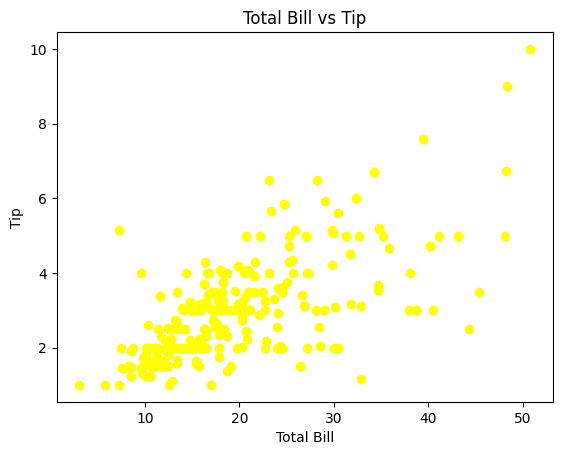

In [14]:
#Relationship check
#Before using any model,we need to confirm relationship between dependent and independent variables
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'],color='yellow')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')  

plt.show()

Observations:
1.As the bill increases tip increases
2.Relationship=Straight line(we can use linear regression)


In [15]:
#5.Feature and Target separation
X=df[['total_bill']] #Feature independent 2d only
y=df['tip']  #Feature output 1d


In [16]:


#Train Test Split
#A model must perform well on unseen data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
#Feature standardization
'''1.Compare the coefficients fairly
2.Avoid the Dominance of Large values
3.Prepare for Ridge/lasso'''
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
'''Imp:
1.Fit only on training data
2.Prevents the data leakage'''

'Imp:\n1.Fit only on training data\n2.Prevents the data leakage'

In [18]:
#Train Linear Rehression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_scaled,y_train)
print("Coefficient:",model.coef_[0])
print("Intercept:",model.intercept_)
y_pred=model.predict(X_test_scaled)

Coefficient: 0.9357171400271826
Intercept: 3.0877948717948724


In [19]:
#Model Evaluation
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("RMSE:",rmse)



R2 Score: 0.5449381659234664
MSE: 0.5688142529229538
RMSE: 0.7541977545199626


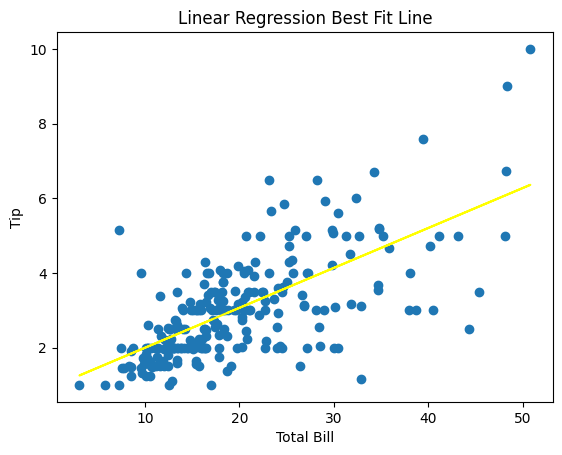

In [20]:
#Visualize the Best fit line

plt.scatter(X,y)
plt.plot(X,model.predict(scaler.transform(X)),color='yellow')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression Best Fit Line')
plt.show()

In [24]:
#Input - Output Real time
while True:
    try:
        bill_amount = float(input("Enter the total bill amount: "))
        break
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

bill_scaled = scaler.transform(pd.DataFrame([[bill_amount]], columns=['total_bill']))
predict_tip = model.predict(bill_scaled)
print(f"Predicted Tip: ${predict_tip[0]:.2f}")

Predicted Tip: $2.21
